# Time Series Prediction With MLP and LSTM in Keras

##### Data Set:

International airline passengers prediction problem.
	
    This is a problem where given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. 
    The data ranges from January 1949 to December 1960 or 12 years, with 144 observations.

##### Load required modules

In [74]:
import numpy
import math
import matplotlib.pyplot as plt

from pandas import DataFrame, concat, read_csv

from keras.models import Sequential
from keras.layers import Dense, LSTM 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

##### Set current working directory

In [75]:
import os
PATH = os.getcwd()

Set directory to the place where data exist

In [76]:
os.chdir(PATH)

##### Fix random seed for reproducibility

In [77]:
import numpy
numpy.random.seed(123)

##### Load this dataset using the Pandas library. 


    Given that each observation is separated by the same interval of one month. 

        Exclude the first column.

    The downloaded dataset has footer information. 

        That can be exclude with the skipfooter argument to pandas.read_csv() set to 3 for the 3 footer lines.

In [78]:
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)

In [79]:
print (dataframe.head())

   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0                                                112                             
1                                                118                             
2                                                132                             
3                                                129                             
4                                                121                             


##### Extract the NumPy array from the dataframe and convert the integer values to floating point values.

In [80]:
dataset = dataframe.values
dataset = dataset.astype('float32')

##### Plot the dataset

In [81]:
plt.plot(dataset)
plt.show()

##### Split the data into train and test

    Note: With time series data, the sequence is important. So split the ordered dataset into train and test.


In [82]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

96 48


##### Normalize the Data

    Normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train)

train_Scal = scaler.transform(train)

test_Scal = scaler.transform(test)

In [84]:
print (train_Scal[:10])

[[0.02588999]
 [0.04530746]
 [0.09061491]
 [0.08090615]
 [0.05501619]
 [0.10032365]
 [0.14239484]
 [0.14239484]
 [0.10355988]
 [0.04854369]]


## Multilayer Perceptron Regression

##### Phrase the time series prediction problem as a regression problem.  

    I.e. given the number of passengers this month, what will be the number of passengers next month.

##### Write a function to convert single column of data into a two-column dataset. 

    The first column containing this month’s (t-1) passenger count and the second column containing next month’s (t) passenger count, to be predicted.

The function takes two arguments

    The dataset, which is a NumPy array and 
    The look_back, which is the number of previous time steps to use as input variables to predict the next time period (defaulted is 1)

    This default will create a dataset where X is the number of passengers at a given time (t-1) and Y is the number of passengers at the next time (t).

In [85]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back = 1):       
    y = DataFrame(dataset)
    X = [y.shift(i) for i in range(1, look_back+1)]
    X = concat(X, axis=1)
    X.fillna(0, inplace = True)
    return X.values, y.values

##### Prepare train and test dataset where X = t and Y = t+1

    Using create_dataset function

In [86]:
look_back = 1

trainX, trainY = create_dataset(train_Scal)
testX, testY = create_dataset(test_Scal)

##### Create Multilayer Perceptron model 
    With 1 input, 1 hidden layer with 8 neurons and an output layer.`

In [87]:
model = Sequential()

model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))

##### Compilte the mode

In [88]:
model.compile(loss='mean_squared_error', optimizer='adam')

##### Fit the model

In [89]:
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
 - 0s - loss: 0.1484
Epoch 2/100
 - 0s - loss: 0.0725
Epoch 3/100
 - 0s - loss: 0.0414
Epoch 4/100
 - 0s - loss: 0.0287
Epoch 5/100
 - 0s - loss: 0.0230
Epoch 6/100
 - 0s - loss: 0.0202
Epoch 7/100
 - 0s - loss: 0.0179
Epoch 8/100
 - 0s - loss: 0.0164
Epoch 9/100
 - 0s - loss: 0.0149
Epoch 10/100
 - 0s - loss: 0.0138
Epoch 11/100
 - 0s - loss: 0.0128
Epoch 12/100
 - 0s - loss: 0.0119
Epoch 13/100
 - 0s - loss: 0.0111
Epoch 14/100
 - 0s - loss: 0.0104
Epoch 15/100
 - 0s - loss: 0.0099
Epoch 16/100
 - 0s - loss: 0.0095
Epoch 17/100
 - 0s - loss: 0.0090
Epoch 18/100
 - 0s - loss: 0.0085
Epoch 19/100
 - 0s - loss: 0.0082
Epoch 20/100
 - 0s - loss: 0.0079
Epoch 21/100
 - 0s - loss: 0.0075
Epoch 22/100
 - 0s - loss: 0.0073
Epoch 23/100
 - 0s - loss: 0.0070
Epoch 24/100
 - 0s - loss: 0.0068
Epoch 25/100
 - 0s - loss: 0.0066
Epoch 26/100
 - 0s - loss: 0.0064
Epoch 27/100
 - 0s - loss: 0.0064
Epoch 28/100
 - 0s - loss: 0.0061
Epoch 29/100
 - 0s - loss: 0.0060
Epoch 30/100
 - 0s - lo

##### Estimate the performance of the model

In [90]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.07 RMSE)
Test Score: 0.03 MSE (0.19 RMSE)


##### Predictions using the built model

In [91]:
trainPredict_Scal = model.predict(trainX)

testPredict_Scal = model.predict(testX)

##### Invert the predictions back to same units as the original data 

In [92]:
trainPredict = scaler.inverse_transform(trainPredict_Scal)

testPredict = scaler.inverse_transform(testPredict_Scal)

##### Plot the data

    Because of how the dataset was prepared, we must shift the predictions so that they aline with the original data on on the x-axis. 

In [93]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):, :] = testPredict 

<IPython.core.display.Javascript object>


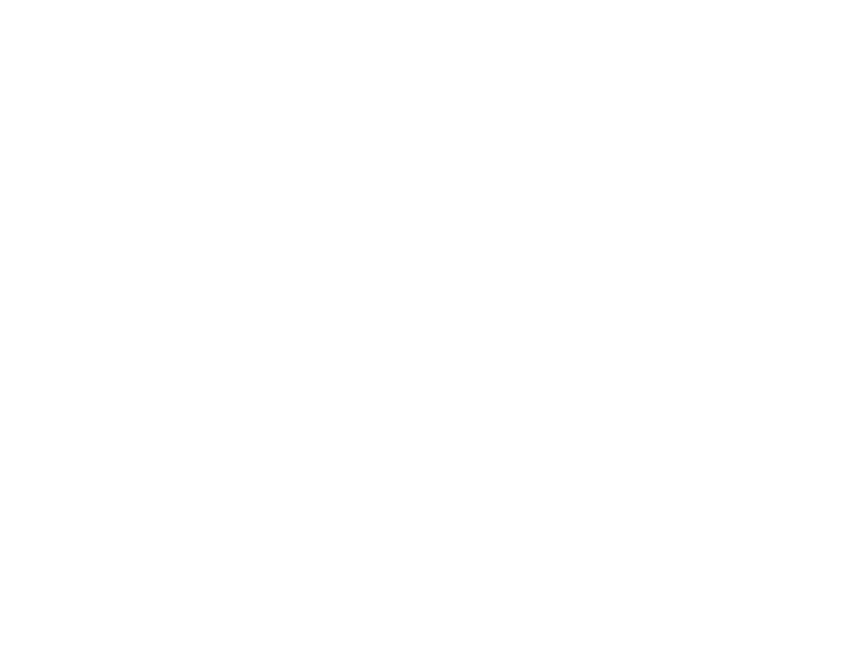

In [94]:
%matplotlib notebook
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## Multilayer Perceptron Using the Window Method

Multiple recent time steps can be used to make the prediction for the next time step. This is called the window method, and the size of the window is a parameter that can be tuned for each problem.

    E.g. time (t-2), time (t-1), and time (t) can be used predict time (t+1).

##### Prepare train and test dataset where X = t-2, t-1, t and Y = t+1

    Using create_dataset function

In [95]:
look_back = 3
trainX, trainY = create_dataset(train_Scal, look_back)
testX, testY = create_dataset(test_Scal, look_back)

In [96]:
print (trainX)

[[0.         0.         0.        ]
 [0.02588999 0.         0.        ]
 [0.04530746 0.02588999 0.        ]
 [0.09061491 0.04530746 0.02588999]
 [0.08090615 0.09061491 0.04530746]
 [0.05501619 0.08090615 0.09061491]
 [0.10032365 0.05501619 0.08090615]
 [0.14239484 0.10032365 0.05501619]
 [0.14239484 0.14239484 0.10032365]
 [0.10355988 0.14239484 0.14239484]
 [0.04854369 0.10355988 0.14239484]
 [0.         0.04854369 0.10355988]
 [0.04530746 0.         0.04854369]
 [0.03559873 0.04530746 0.        ]
 [0.07119742 0.03559873 0.04530746]
 [0.11974111 0.07119742 0.03559873]
 [0.10032365 0.11974111 0.07119742]
 [0.06796119 0.10032365 0.11974111]
 [0.14563107 0.06796119 0.10032365]
 [0.21359226 0.14563107 0.06796119]
 [0.21359226 0.21359226 0.14563107]
 [0.17475727 0.21359226 0.21359226]
 [0.09385115 0.17475727 0.21359226]
 [0.03236246 0.09385115 0.17475727]
 [0.11650488 0.03236246 0.09385115]
 [0.13268611 0.11650488 0.03236246]
 [0.14886734 0.13268611 0.11650488]
 [0.2394822  0.14886734 0.13

##### Create Multilayer Perceptron model 
    With 3 input, 1 hidden layer with 8 neurons and an output layer.`

In [97]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))

##### Compile the model

In [98]:
model.compile(loss='mean_squared_error', optimizer='adam')

##### Fit the model 

In [99]:
model.fit(trainX, trainY, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0279
Epoch 2/100
 - 0s - loss: 0.0107
Epoch 3/100
 - 0s - loss: 0.0093
Epoch 4/100
 - 0s - loss: 0.0088
Epoch 5/100
 - 0s - loss: 0.0082
Epoch 6/100
 - 0s - loss: 0.0081
Epoch 7/100
 - 0s - loss: 0.0077
Epoch 8/100
 - 0s - loss: 0.0075
Epoch 9/100
 - 0s - loss: 0.0073
Epoch 10/100
 - 0s - loss: 0.0071
Epoch 11/100
 - 0s - loss: 0.0070
Epoch 12/100
 - 0s - loss: 0.0069
Epoch 13/100
 - 0s - loss: 0.0074
Epoch 14/100
 - 0s - loss: 0.0069
Epoch 15/100
 - 0s - loss: 0.0066
Epoch 16/100
 - 0s - loss: 0.0066
Epoch 17/100
 - 0s - loss: 0.0065
Epoch 18/100
 - 0s - loss: 0.0064
Epoch 19/100
 - 0s - loss: 0.0065
Epoch 20/100
 - 0s - loss: 0.0063
Epoch 21/100
 - 0s - loss: 0.0064
Epoch 22/100
 - 0s - loss: 0.0062
Epoch 23/100
 - 0s - loss: 0.0061
Epoch 24/100
 - 0s - loss: 0.0061
Epoch 25/100
 - 0s - loss: 0.0059
Epoch 26/100
 - 0s - loss: 0.0059
Epoch 27/100
 - 0s - loss: 0.0060
Epoch 28/100
 - 0s - loss: 0.0063
Epoch 29/100
 - 0s - loss: 0.0057
Epoch 30/100
 - 0s - lo

##### Estimate the performance of the model

In [100]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.07 RMSE)
Test Score: 0.03 MSE (0.18 RMSE)


##### Predictions using the built model

In [101]:
trainPredict_Scal = model.predict(trainX)
testPredict_Scal = model.predict(testX)

##### Invert the predictions back to same units as the original data 

In [102]:
trainPredict = scaler.inverse_transform(trainPredict_Scal)

testPredict = scaler.inverse_transform(testPredict_Scal)

#### Preparte and plot the data



In [103]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):, :] = testPredict 

<IPython.core.display.Javascript object>


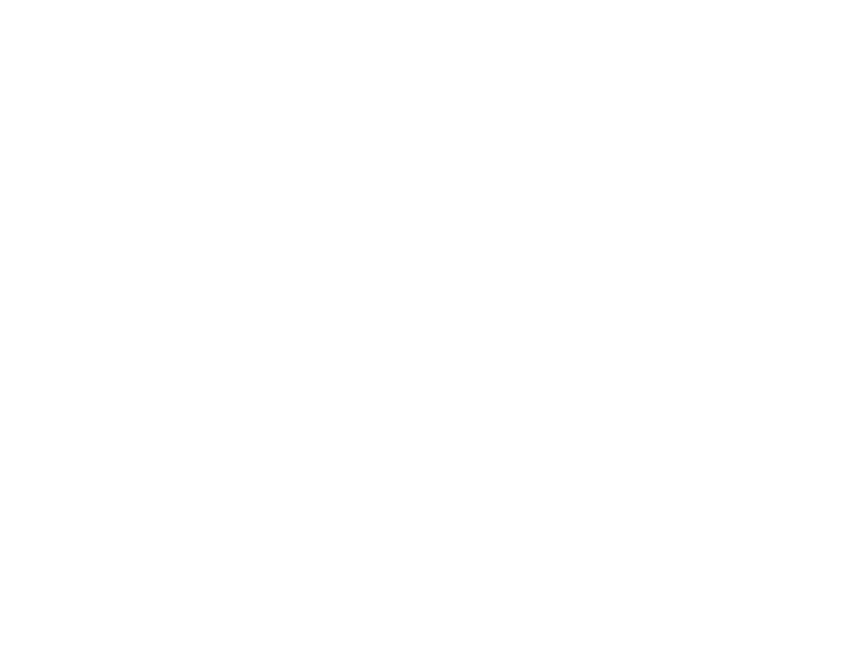

In [104]:
%matplotlib notebook

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## LSTM Recurrent Neural Networks for Time Series

    Unlike regression predictive modeling, time series also adds the complexity of a sequence dependence among the input variables.
    A powerful type of neural network designed to handle sequence dependence is called recurrent neural networks. 

##### Prepare the train and test datasets 
    Using create_dataset function

In [105]:
# reshape into X = t and Y = t+1
look_back = 1

trainX, trainY = create_dataset(train_Scal)
testX, testY = create_dataset(test_Scal)

#### The LSTM network expects the input data (X) to be provided with a specific array structure in the form 

    [samples, time steps, features].

Currently, our data is in the form: [samples, features]

We are framing the problem as one time step for each sample. 

##### Transform the train and test input data into the expected structure using numpy.reshape()

In [106]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

###### Design and fit our LSTM network for this problem.

The network has 

    A visible layer with 1 input, 
    A hidden layer with 4 LSTM blocks or neurons, and 
    An output layer that makes a single value prediction. 
    The default sigmoid activation function is used for the LSTM blocks. 
    The network is trained for 100 epochs and a batch size of 1 is used.

##### Create the LSTM network

In [107]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))

##### Compile the LSTM network

In [108]:
model.compile(loss='mean_squared_error', optimizer='adam')

##### Fit the LSTM network

In [109]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1300
Epoch 2/100
 - 0s - loss: 0.0706
Epoch 3/100
 - 0s - loss: 0.0449
Epoch 4/100
 - 0s - loss: 0.0360
Epoch 5/100
 - 0s - loss: 0.0320
Epoch 6/100
 - 0s - loss: 0.0293
Epoch 7/100
 - 0s - loss: 0.0273
Epoch 8/100
 - 0s - loss: 0.0246
Epoch 9/100
 - 0s - loss: 0.0221
Epoch 10/100
 - 0s - loss: 0.0198
Epoch 11/100
 - 0s - loss: 0.0176
Epoch 12/100
 - 0s - loss: 0.0155
Epoch 13/100
 - 0s - loss: 0.0138
Epoch 14/100
 - 0s - loss: 0.0121
Epoch 15/100
 - 0s - loss: 0.0107
Epoch 16/100
 - 0s - loss: 0.0095
Epoch 17/100
 - 0s - loss: 0.0086
Epoch 18/100
 - 0s - loss: 0.0079
Epoch 19/100
 - 0s - loss: 0.0073
Epoch 20/100
 - 0s - loss: 0.0068
Epoch 21/100
 - 0s - loss: 0.0064
Epoch 22/100
 - 0s - loss: 0.0063
Epoch 23/100
 - 0s - loss: 0.0061
Epoch 24/100
 - 0s - loss: 0.0060
Epoch 25/100
 - 0s - loss: 0.0058
Epoch 26/100
 - 0s - loss: 0.0058
Epoch 27/100
 - 0s - loss: 0.0059
Epoch 28/100
 - 0s - loss: 0.0058
Epoch 29/100
 - 0s - loss: 0.0057
Epoch 30/100
 - 0s - lo

##### Estimate the performance of the model

In [110]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.07 RMSE)
Test Score: 0.03 MSE (0.18 RMSE)


##### Predictions using the built model

In [111]:
trainPredict_Scal = model.predict(trainX)
testPredict_Scal = model.predict(testX)

Invert the predictions before calculating error scores to ensure that performance is reported in the same units as the original data 

In [112]:
trainPredict = scaler.inverse_transform(trainPredict_Scal)

testPredict = scaler.inverse_transform(testPredict_Scal)

#### Preparte and plot the data



In [113]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):, :] = testPredict 

<IPython.core.display.Javascript object>


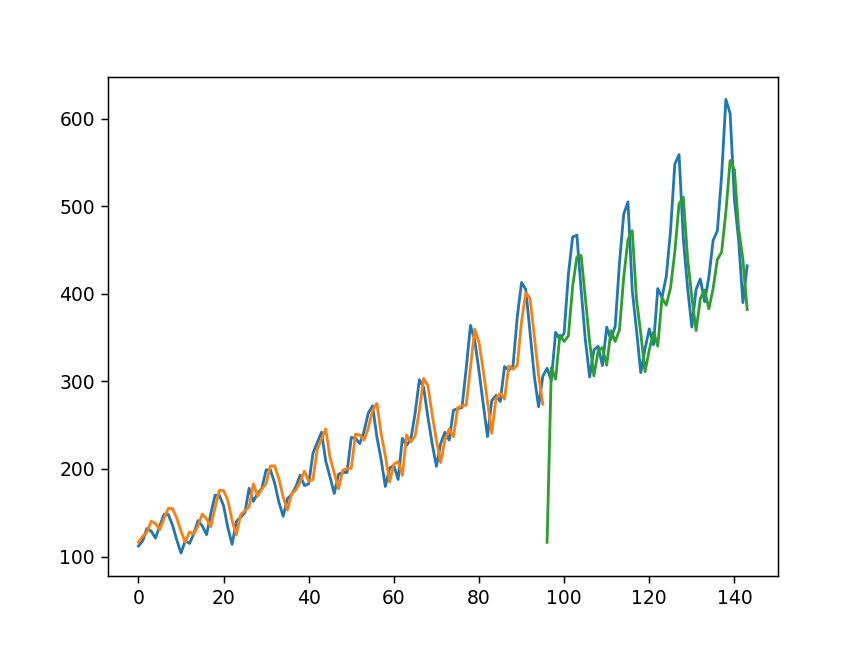

In [114]:
%matplotlib notebook

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### LSTM for Regression Using the Window Method

##### Create train and test data
    Input variables are t-2, t-1, t and the output variable is t+1.

In [115]:
look_back = 3

trainX, trainY = create_dataset(train_Scal, look_back)
testX, testY = create_dataset(test_Scal, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form 

    [samples, time steps, features].

##### Reshape input to be [samples, time steps, features]

In [116]:
print (trainX[:10], trainX.shape)

[[0.         0.         0.        ]
 [0.02588999 0.         0.        ]
 [0.04530746 0.02588999 0.        ]
 [0.09061491 0.04530746 0.02588999]
 [0.08090615 0.09061491 0.04530746]
 [0.05501619 0.08090615 0.09061491]
 [0.10032365 0.05501619 0.08090615]
 [0.14239484 0.10032365 0.05501619]
 [0.14239484 0.14239484 0.10032365]
 [0.10355988 0.14239484 0.14239484]] (96, 3)


In [117]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [118]:
print (trainX[:10], trainX.shape)

[[[0.         0.         0.        ]]

 [[0.02588999 0.         0.        ]]

 [[0.04530746 0.02588999 0.        ]]

 [[0.09061491 0.04530746 0.02588999]]

 [[0.08090615 0.09061491 0.04530746]]

 [[0.05501619 0.08090615 0.09061491]]

 [[0.10032365 0.05501619 0.08090615]]

 [[0.14239484 0.10032365 0.05501619]]

 [[0.14239484 0.14239484 0.10032365]]

 [[0.10355988 0.14239484 0.14239484]]] (96, 1, 3)


#4th Model is wrong in Reshaping.It is corrected in 5th model.

##### Create the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))

##### Compile the LSTM network


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Model Summary 

In [ ]:
model.summary()

In [ ]:
from keras.utils.layer_utils import print_summary
print_summary(model)

##### Fit the LSTM network

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

##### Estimate the performance of the model

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

##### Predictions using the built model

In [ ]:
trainPredict_Scal = model.predict(trainX)
testPredict_Scal = model.predict(testX)

##### Invert the predictions back to same units as the original data 

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict_Scal)

testPredict = scaler.inverse_transform(testPredict_Scal)

#### Preparte and plot the data



In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):, :] = testPredict 

In [ ]:
%matplotlib notebook

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


### LSTM for Regression with Time Steps

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature.

In [ ]:
# reshape into X=t-2, t-1, t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train_Scal, look_back)
testX, testY = create_dataset(test_Scal, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form 

    [samples, time steps, features].

##### Reshape input to be [samples, time steps, features]

In [ ]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

##### Create the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(1, input_shape=(look_back, 1)))
model.add(Dense(1))

##### Compile the LSTM network

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
print (model.summary())

##### Fit the LSTM network

In [ ]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

##### Estimate the performance of the model

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

##### Predictions using the built model

In [ ]:
trainPredict_Scal = model.predict(trainX)
testPredict_Scal = model.predict(testX)

##### Invert the predictions back to same units as the original data 

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict_Scal)

testPredict = scaler.inverse_transform(testPredict_Scal)

#### Preparte and plot the data



In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[:len(trainPredict), :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict):, :] = testPredict 

In [ ]:
%matplotlib notebook

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
print("Finish")

Reference

    https://keras.io/
    http://machinelearningmastery.com
    http://scikit-learn.org/stable/modules/classes.html